In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets

# mengimport package plotly
import plotly.express as px
import matplotlib.pyplot as plt

# Mempersiapkan Dataset

In [3]:
# Membuat dataset dengan menggunakan sklear
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
print(X_numpy, y_numpy)


[[-0.61175641]
 [-0.24937038]
 [ 0.48851815]
 [ 0.76201118]
 [ 1.51981682]
 [ 0.37756379]
 [ 0.51292982]
 [-0.67124613]
 [-1.39649634]
 [ 0.31563495]
 [-0.63699565]
 [-0.39675353]
 [-1.10061918]
 [ 0.90085595]
 [-1.09989127]
 [ 0.82797464]
 [-0.07557171]
 [-0.35224985]
 [-0.67066229]
 [-1.07296862]
 [-0.30620401]
 [ 2.18557541]
 [ 0.86540763]
 [ 0.19829972]
 [-0.38405435]
 [-0.68372786]
 [ 0.05080775]
 [ 0.58281521]
 [ 1.25286816]
 [-0.75439794]
 [-0.34934272]
 [-0.88762896]
 [ 0.18656139]
 [ 0.87616892]
 [ 0.83898341]
 [-0.50446586]
 [-0.34385368]
 [ 1.6924546 ]
 [-2.3015387 ]
 [ 0.93110208]
 [ 2.10025514]
 [ 1.46210794]
 [-0.84520564]
 [-0.87785842]
 [-0.3224172 ]
 [ 0.88514116]
 [ 0.16003707]
 [ 1.13162939]
 [-0.37528495]
 [ 0.50249434]
 [-0.20889423]
 [ 0.12015895]
 [ 0.58662319]
 [ 0.3190391 ]
 [-0.69166075]
 [ 0.69803203]
 [ 1.19891788]
 [-0.20075807]
 [ 0.53035547]
 [ 0.74204416]
 [ 0.41005165]
 [ 0.11900865]
 [-0.7612069 ]
 [ 0.42349435]
 [ 0.30017032]
 [-1.1425182 ]
 [ 0.18515

In [4]:
# Mengkonversi dataset numpy ke tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
print(X, y)
print(X.shape)

tensor([[-0.6118],
        [-0.2494],
        [ 0.4885],
        [ 0.7620],
        [ 1.5198],
        [ 0.3776],
        [ 0.5129],
        [-0.6712],
        [-1.3965],
        [ 0.3156],
        [-0.6370],
        [-0.3968],
        [-1.1006],
        [ 0.9009],
        [-1.0999],
        [ 0.8280],
        [-0.0756],
        [-0.3522],
        [-0.6707],
        [-1.0730],
        [-0.3062],
        [ 2.1856],
        [ 0.8654],
        [ 0.1983],
        [-0.3841],
        [-0.6837],
        [ 0.0508],
        [ 0.5828],
        [ 1.2529],
        [-0.7544],
        [-0.3493],
        [-0.8876],
        [ 0.1866],
        [ 0.8762],
        [ 0.8390],
        [-0.5045],
        [-0.3439],
        [ 1.6925],
        [-2.3015],
        [ 0.9311],
        [ 2.1003],
        [ 1.4621],
        [-0.8452],
        [-0.8779],
        [-0.3224],
        [ 0.8851],
        [ 0.1600],
        [ 1.1316],
        [-0.3753],
        [ 0.5025],
        [-0.2089],
        [ 0.1202],
        [ 0.

In [5]:
# Reshape dataset menjadi 2 dimensi
y = y.view(y.shape[0], 1)
print(y)

tensor([[-5.5539e+01],
        [-1.0662e+01],
        [ 2.2757e+01],
        [ 1.0110e+02],
        [ 1.4434e+02],
        [ 3.3289e+01],
        [ 3.3015e+01],
        [-2.5887e+01],
        [-9.9639e+01],
        [ 2.3803e+01],
        [-4.5589e+01],
        [-8.3388e+00],
        [-9.5315e+01],
        [ 3.6407e+01],
        [-8.7293e+01],
        [ 6.7669e+01],
        [-1.3687e+01],
        [-5.5441e+01],
        [-6.5340e+01],
        [-5.4450e+01],
        [-2.8835e+01],
        [ 1.7884e+02],
        [ 6.5084e+01],
        [ 2.6668e+01],
        [-1.8546e+01],
        [-4.1499e+01],
        [ 8.5583e-01],
        [ 4.4562e+01],
        [ 1.1598e+02],
        [-6.4620e+01],
        [-2.5931e+01],
        [-6.0882e+01],
        [ 1.8720e+01],
        [ 7.5070e+01],
        [ 1.1720e+02],
        [-2.2698e+01],
        [-5.6363e+01],
        [ 1.8084e+02],
        [-1.9257e+02],
        [ 6.8503e+01],
        [ 1.6552e+02],
        [ 1.0500e+02],
        [-7.0434e+01],
        [-5

In [6]:
# Memuat jumlah sample dan jumlah feature
n_samples, n_features = X.shape

In [7]:
# Memplot dataset dengan plotly
fig = px.scatter(X_numpy, y_numpy)
fig.show()

# Menentukan Hyperparameter

In [8]:
# Membuat model linear regression (inputsise, outputsize) menggunakan 'nn.linear' layer pytorch
model = nn.Linear(n_features, 1)

# Menentukan loss dan optimizer
learning_rate   = 0.01
loss_fn         = nn.MSELoss()
optimizer       = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training

In [9]:
# Mengiterasi model
num_epochs = 1000
for epoch in range(num_epochs):
    # Lalukakan prediksi y dengan model in inputan X
    y_predicted = model(X)

    # Menghitung loss dari y yang diprediksi terhadap y yang sebenarnya
    loss = loss_fn(y_predicted, y)

    # Menghitung gradient dari loss
    loss.backward()

    # Mengupdate model
    optimizer.step()

    # Mengkosongkan gradient
    optimizer.zero_grad()

    # Menampilkan loss
    if (epoch+1) % 10 == 0:
        print("Epoch {}/{} Loss: {}".format(epoch+1, num_epochs, loss.item()))

Epoch 10/1000 Loss: 4475.28125
Epoch 20/1000 Loss: 3334.974365234375
Epoch 30/1000 Loss: 2510.6005859375
Epoch 40/1000 Loss: 1913.955322265625
Epoch 50/1000 Loss: 1481.67822265625
Epoch 60/1000 Loss: 1168.18408203125
Epoch 70/1000 Loss: 940.6295166015625
Epoch 80/1000 Loss: 775.3192138671875
Epoch 90/1000 Loss: 655.1356201171875
Epoch 100/1000 Loss: 567.6986694335938
Epoch 110/1000 Loss: 504.04534912109375
Epoch 120/1000 Loss: 457.6787414550781
Epoch 130/1000 Loss: 423.8857421875
Epoch 140/1000 Loss: 399.2447509765625
Epoch 150/1000 Loss: 381.2691345214844
Epoch 160/1000 Loss: 368.1504211425781
Epoch 170/1000 Loss: 358.5726623535156
Epoch 180/1000 Loss: 351.57769775390625
Epoch 190/1000 Loss: 346.4674987792969
Epoch 200/1000 Loss: 342.7330322265625
Epoch 210/1000 Loss: 340.00335693359375
Epoch 220/1000 Loss: 338.00762939453125
Epoch 230/1000 Loss: 336.5481262207031
Epoch 240/1000 Loss: 335.48065185546875
Epoch 250/1000 Loss: 334.6996765136719
Epoch 260/1000 Loss: 334.12823486328125
Epo

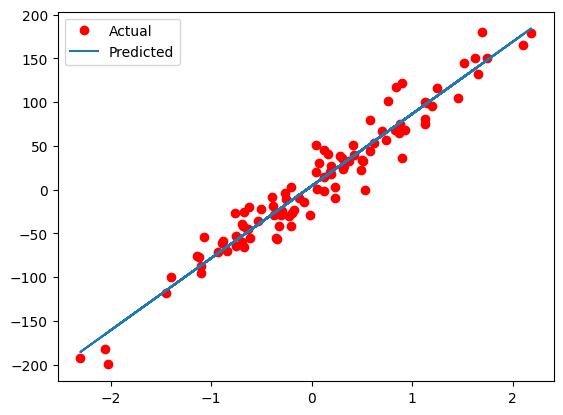

In [10]:
# Plot hasil prediksi
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro', label="Actual")
plt.plot(X_numpy, predicted, label="Predicted")
plt.legend()
plt.show()